<a href="https://colab.research.google.com/github/Femonello/bootcamp-data-analytics/blob/main/Estat%C3%ADstica_Frequencia_e_Medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Estatística: Frequências e Medidas**

In [18]:
#bibliotecas base
import pandas as pd
import numpy as np
#biblicotecas de visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
#biblioteca estatísitca
import scipy.stats as stats

## **Leitura e formatação inicial dos dados**

In [37]:
#importando dados da kaggehub // exemplo da aula utilizou o pydataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jjdaguirre/forbes-billionaires-2022")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/jjdaguirre/forbes-billionaires-2022/versions/1


In [38]:
import os

# Listar os arquivos dentro da pasta do dataset
print(os.listdir(path))

['2022_forbes_billionaires.csv']


In [39]:
df = pd.read_csv(path + '/2022_forbes_billionaires.csv')
df.head(100)

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
95,95,96,Steve Cohen,$17.4 B,65,United States,hedge funds,Finance & Investments
96,96,97,Vladimir Potanin,$17.3 B,61,Russia,metals,Metals & Mining
97,97,98,Harold Hamm & family,$17.2 B,76,United States,oil & gas,Energy
98,98,99,Sun Piaoyang,$17.1 B,63,China,pharmaceuticals,Healthcare


In [40]:
#verificando os tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2600 non-null   int64 
 1   rank        2600 non-null   int64 
 2   name        2600 non-null   object
 3   networth    2600 non-null   object
 4   age         2600 non-null   int64 
 5   country     2600 non-null   object
 6   source      2600 non-null   object
 7   industry    2600 non-null   object
dtypes: int64(3), object(5)
memory usage: 162.6+ KB


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True) #Eliminando coluna

In [43]:
# Removendo caracteres especiais da coluna networth
df['networth'] = df['networth'].str.replace('[^.0-9]', '', regex=True)
df['networth'] = df['networth'].astype('float')
df.head(100)


,rank,name,networth,age,country,source,industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
95,96,Steve Cohen,17.4,65,United States,hedge funds,Finance & Investments
96,97,Vladimir Potanin,17.3,61,Russia,metals,Metals & Mining
97,98,Harold Hamm & family,17.2,76,United States,oil & gas,Energy
98,99,Sun Piaoyang,17.1,63,China,pharmaceuticals,Healthcare


In [44]:
#verificando os tipos novamente para confirmar a alteração da coluna networth
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rank      2600 non-null   int64  
 1   name      2600 non-null   object 
 2   networth  2600 non-null   float64
 3   age       2600 non-null   int64  
 4   country   2600 non-null   object 
 5   source    2600 non-null   object 
 6   industry  2600 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 142.3+ KB


# **Encontrando a tendência central**

Aplicando moda para todas as colunas exceto colunas de rank e name  que são únicas.

In [46]:
df.iloc[:,2:7].mode()

,networth,age,country,source,industry
0,1.5,64,United States,real estate,Finance & Investments


Encontrando a média e mediana das colunas networth e idade

In [47]:
#Média
df[['networth','age']].mean()

,0
networth,4.860750
age,64.271923


In [48]:
#Mediana
df[['networth','age']].median()

,0
networth,2.4
age,64.0


In [49]:
df.describe()

,rank,networth,age
count,2600.000000,2600.000000,2600.000000
mean,1269.570769,4.860750,64.271923
std,728.146364,10.659671,13.220607
min,1.000000,1.000000,19.000000
25%,637.000000,1.500000,55.000000
50%,1292.000000,2.400000,64.000000
75%,1929.000000,4.500000,74.000000
max,2578.000000,219.000000,100.000000


## **Analisando Amplitude, variança e desvio padrão**

In [50]:
### essa funcao: adiciona no describe anterior as colunas de amplitude e variancia.
### a amplitude será o máximo - minimo valor
### a variancia será o desvio padrão ao quadrado
def describe_new(df):
    df1 = df.describe()
    df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
    df1.loc["variancia"] = df1.loc['std']*df1.loc['std']
    return df1

In [51]:
describe_new(df[['networth','age']])

,networth,age
count,2600.000000,2600.000000
mean,4.860750,64.271923
std,10.659671,13.220607
min,1.000000,19.000000
25%,1.500000,55.000000
50%,2.400000,64.000000
75%,4.500000,74.000000
max,219.000000,100.000000
amplitude,218.000000,81.000000
variancia,113.628579,174.784436


### **Histograma**

<Figure size 800x1000 with 0 Axes>

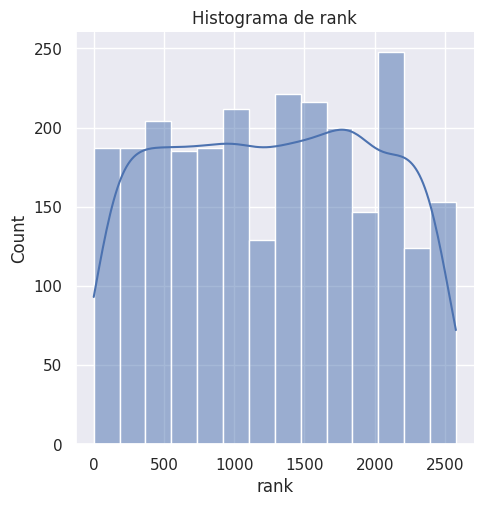

<Figure size 800x1000 with 0 Axes>

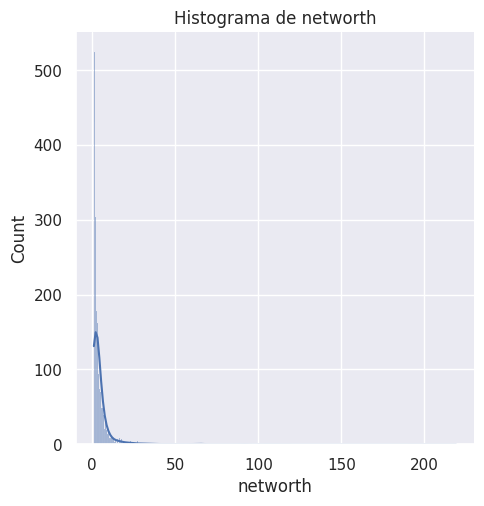

<Figure size 800x1000 with 0 Axes>

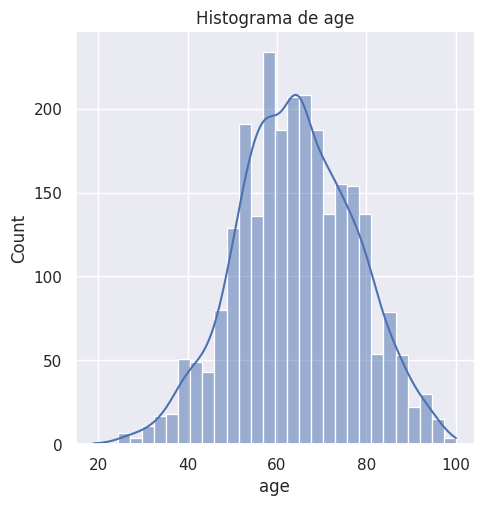

In [52]:
plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()

for colunas in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.displot(data=df, x=colunas, kde=True)
    plt.title(f'Histograma de {colunas}')
    plt.show()

### **Boxplot**

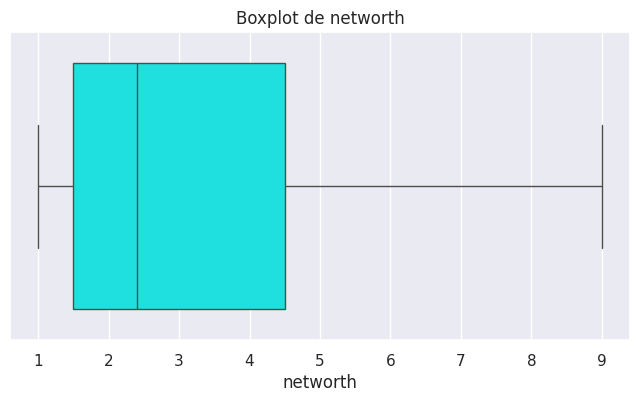

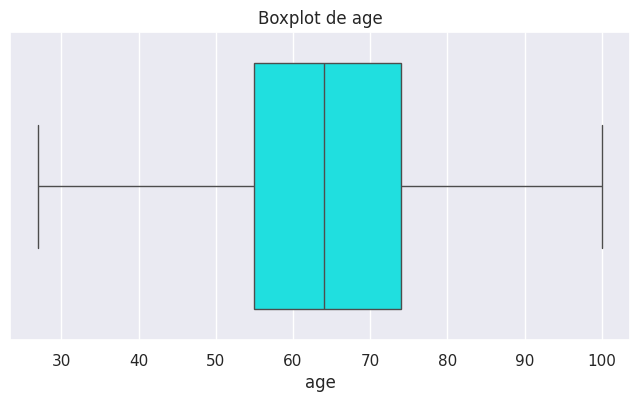

In [54]:
plt.rcParams['figure.figsize'] = [8, 4]
sns.set_theme()

# Lista de colunas a excluir
colunas_excluir = ['rank']

# Selecionando colunas numéricas e excluindo as indesejadas
colunas_validas = [col for col in df.select_dtypes(include=np.number).columns if col not in colunas_excluir]

for coluna in colunas_validas:
    plt.figure()
    sns.boxplot(data=df, x=coluna, color='cyan',showfliers=False)
    plt.title(f'Boxplot de {coluna}')
    plt.show()

###**Outliers**

####**Método zscore**

O método z-score utiliza como referencia a quantos desvios padrões a informação está da média

Se Z-score > 3 desvios padroes geralmente se pode considerar um outlier.

In [55]:
from scipy import stats ### pacote de estatística que contem a funcao z-score

In [66]:
def outliers_zscore(dataset, threshold, colname):
   df = dataset[colname]
   outliers = [] #criando uma lista vazia para armazenamento dos outliers
   z_scores=[]
   threshold = threshold
   mean = np.mean(df) #media do dataset
   std = np.std(df) #desvio padrão do dataset

   for i in df.values:
      z = (i-mean)/std #calculando o z-score
      z_scores.append(z)
      if np.abs(z) > threshold: #se o zscore calculado do item for maior que o threshould, adiciona na lista de outliers
        outliers.append(i)
   print("o número de outliers encontrado em {} foi de: ".format(colname),len(outliers))
   return outliers, z_scores

o número de outliers encontrado em rank foi de:  0
o número de outliers encontrado em networth foi de:  34
o número de outliers encontrado em age foi de:  1


<Figure size 1000x500 with 0 Axes>

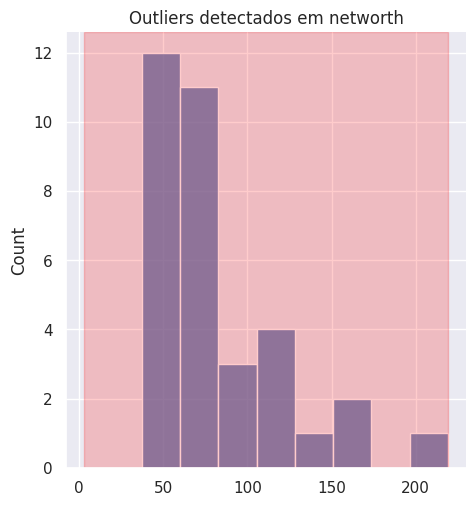

<Figure size 1000x500 with 0 Axes>

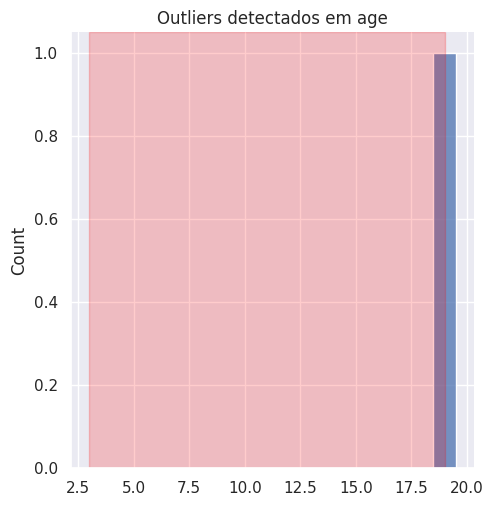

In [70]:
for colunas in df.select_dtypes(include=np.number).columns:
  zscore, out = outliers_zscore(df, 3, colunas)
  if len(out) > 0 and len(zscore) > 0:
    plt.figure(figsize= (10,5))
    sns.displot(zscore)
    plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(colunas))

####**Método IQR (Interquartile Range)**

O método IQR (distância inter-quartil em inglês) ve a distancia da amplitude dos quartis:

In [71]:
def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    # calcula  IQR
    iqr = q75 - q25
    # calcula outlier cutoff
    cut_off = iqr * 1.5
    # calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print(' IQR é ',iqr)
   # print('Valor minimo', lower)
   # print('Valor maximo', upper)
    outliers = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
    print('O numero de outliers encontrado foi de', len(outliers))
    return lower, upper, outliers

 IQR é  1292.0
O numero de outliers encontrado foi de 0
 IQR é  3.0
O numero de outliers encontrado foi de 226
 IQR é  19.0
O numero de outliers encontrado foi de 6


<Figure size 1000x600 with 0 Axes>

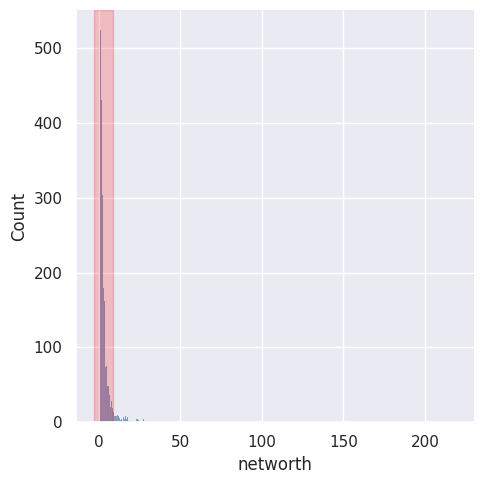

<Figure size 1000x600 with 0 Axes>

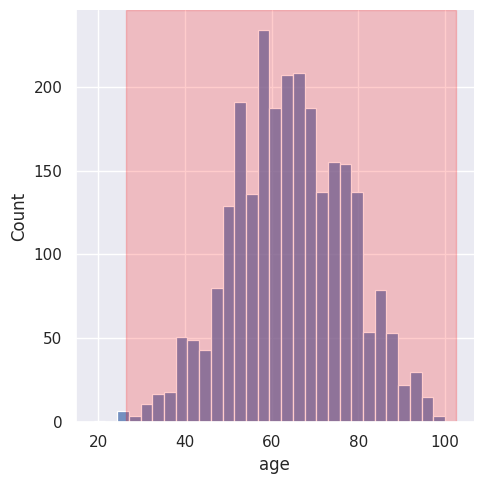

In [75]:
for coluna in df.select_dtypes(include=np.number).columns:
  lower, upper, outliers = find_outlier_iqr(df, coluna)
  if len(outliers) > 0:
    plt.figure(figsize= (10,6))
    sns.displot(df[coluna], kde=False)
    plt.axvspan(xmin = lower ,xmax= upper,alpha=0.2, color='red')
